<a href="https://colab.research.google.com/github/brunodeblasi/ciencia-de-dados-e-analytics/blob/main/MVP_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP – Análise de Dados e Boas Práticas
# Aluno: Bruno Gall dos Santos De Blasi

## Checklist
### Definição do problema 
**Objetivo: entender e descrever claramente o problema que está sendo resolvido.**

- Qual é a descrição do problema?
- Este é um problema de aprendizado supervisionado ou não supervisionado?
- Que premissas ou hipóteses você tem sobre o problema?
- Que restrições ou condições foram impostas para selecionar os dados?
- Defina cada um dos atributos do dataset. 

### Análise de dados 
**Objetivo: entender a informação disponível.**

**Estatísticas descritivas:**

- Quantos atributos e instâncias existem?
- Quais são os tipos de dados dos atributos?
- Verifique as primeiras linhas do dataset. Algo chama a atenção?
- Há valores faltantes, discrepantes ou inconsistentes?
- Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

**Visualizações:** 

- Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
- Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
- Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados. 

### Pré-processamento de dados: 
**Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.** 

- Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).
- Trate (removendo ou substituindo) os valores faltantes (se existentes).
- Realize outras transformações de dados porventura necessárias.
- Explique, passo a passo, as operações realizadas, justificando cada uma delas.
- Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.

## 1) Definição do problema
Nesta análise, utilizaremos o datset "Breast Cancer Coimbra Data Set". O repositório oferece atributos que indicam a presença ou ausência de câncer de mama. Dessa forma, é possível construir modelos para criar biomarcadores da doença. Trata-se de um problema de classificação (aprendizado supervisionado), a fim de determinar o diagnóstico de pacientes.

Confira a lista de atibutos do dataset:
- **age:** idade (anos);
- **bmi:** índice de massa corporal (kg/m²);
- **glucose:** glicose (mg/dL)
- **insulin:** insulina (µU/mL)
- **homa:** índice de HOMA;
- **leptin:** leptina (ng/mL);
- **adiponectin:** adiponectina(µg/mL);
- **resistin:** resistina (ng/mL);
- **mcp1:** nível de MCP-1 (pg/dL);
- **classification:** status (1 = controles saudáveis; 2 = pacientes)

[O dataset está disponível no UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra).

## 2) Importações e acesso aos dados

Primeiro, nós vamos importar as bibliotecas que serão utilizadas neste projeto.
- **Pandas** e **Numpy** para importar os dados em CSV e realizar as operações estatísticas;
- **Matplotlib, Pyplot e Seaborn** para gerar os gráficos ao visualizar as informações;
- **Missingno** para tratamento de missings;
- **Sklearn** para criar o conjunto de teste.

Também vamos filtrar os warnings para evitar poluições no notebook.

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Após a importação do Pandas, será possível carregar o arquivo CSV com a carga de dados. Este documento está disponível em um repositório do GitHub. 

Para isso, vamos apontar a origem do arquivo ao declarar a variável *dados*. Já os itens do cabeçalho foram descritos na lista _cabecalho_.

Em seguida, também com o Pandas, vamos executar a leitura do arquivo CSV e exibir as primeiras linhas do dataset para verificar se a importação foi bem-sucedida.

O dataset será identificado pela variável _dt_.

In [20]:
# Link do arquivo CSV hospedado em um repositório do GitHub, declarado na variável dados
dados = "https://raw.githubusercontent.com/brunodeblasi/ciencia-de-dados-e-analytics/main/mvp/dataR2.csv"

# Definição do cabeçalho dos atributos
cabecalho = ['age', 'bmi', 'glucose', 'insulin', 'homa', 'leptin', 'adiponectin', 
           'resistin', 'mcp1', 'classification']

# Leitura do arquivo CSV para formar o dataset, apontando a vírgula como delimitadora do arquivo 
dt = pd.read_csv(dados, delimiter=',', names=cabecalho, skiprows=1)

# Demonstração das primeiras linhas do dataset para verificar se a importação foi bem-sucedida
dt.head()

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## 3) Análise dos dados
Após a carga dos dados, é preciso verificar as informações disponíveis no dataset. Estas observações serão averiguadas em dois momentos. 

### 3.2) Estatísticas descritivas 

Nesta etapa, será feita uma análise estatística descrita. O primeiro passo é aplicado na verificação das dez primeiras e últimas linhas do dataset, a fim de compreender o universo das informações oferecidas pelo repositório de informações.

In [3]:
# Exibe as dez primeiras linhas do dataset
dt.head(10)

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [4]:
# Exibe as dez últimas linhas do dataset
dt.tail(10)

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp1,classification
106,45,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273,2
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190,2
108,68,35.560000,131,8.150,2.633537,17.8700,11.900000,4.19000,198.400,2
109,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,2
110,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,2
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,2


A visualização preliminar indica que não há dados faltantes. Todavia, é preciso fazer análises mais elaboradas para determinar se todas as informações foram, de fato, incluídas no arquivo.

Outras informações do dataset podem ser obtidas para ter uma compreensão maior sobre as informações a serem trabalhadas. 

In [5]:
# Resume as informações do dataset
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             116 non-null    int64  
 1   bmi             116 non-null    float64
 2   glucose         116 non-null    int64  
 3   insulin         116 non-null    float64
 4   homa            116 non-null    float64
 5   leptin          116 non-null    float64
 6   adiponectin     116 non-null    float64
 7   resistin        116 non-null    float64
 8   mcp1            116 non-null    float64
 9   classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
None


Nota-se que boa parte dos dados é composta por números reais (float), tendo dois atributos com números inteiros (int): idade e glicose.

Ao todo, o dataset possui 116 entradas e 10 atributos. Essa informação é obtida através do comando "dt.shape", executado a seguir:

In [6]:
dt.shape

(116, 10)

Também é importante fazer um resumo estatístico das informações disponíveis em cada atributo com números reais com o comando _DataFrame.describe()_. Dessa forma, é possível descobrir as seguintes informações:
- **count:** a soma ou contagem de inserções no atributo;
- **mean:** a média dos valores no atributo;
- **std:** desvio padrão das observações;
- **min:** mínimo dos valores no atributo;
- **25%, 50%, 75%:** quartis no atributo;
- **max:** máximo dos valores no atributo.

In [7]:
dt.describe()

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp1,classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


Nota-se, pela linha _count_, que não há dados faltantes. Também há indícios de que não há ausência de informações, ao notar que não há valores mínimos iguais ou inferior a zero.

A classe está inserida corretamente, sem variações além de 1 e 2. No entanto, não há equilíbrio no atributo classificação.

In [8]:
dt.groupby('classification').size()

classification
1    52
2    64
dtype: int64

O Pandas também oferece uma análise de Correlação de Pearson, que será exibida graficamente em outra etapa da análise. O método garante um teste para verificar a correlação estatística entre duas variáveis contínuas. 

In [9]:
dt.corr(method = 'pearson')

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp1,classification
age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
bmi,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
homa,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
mcp1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


### 3.2) Visualizações

Iniciaremos a visualização com Gráficos de Densidade para verificar a distribuição dos atributos. De cara, nota-se que não há um equilíbrio na classificação dos grupos 1 (controle) e 2 (pacientes com câncer de mama), conforme demonstrado nas etapas anteriores dessa análise.

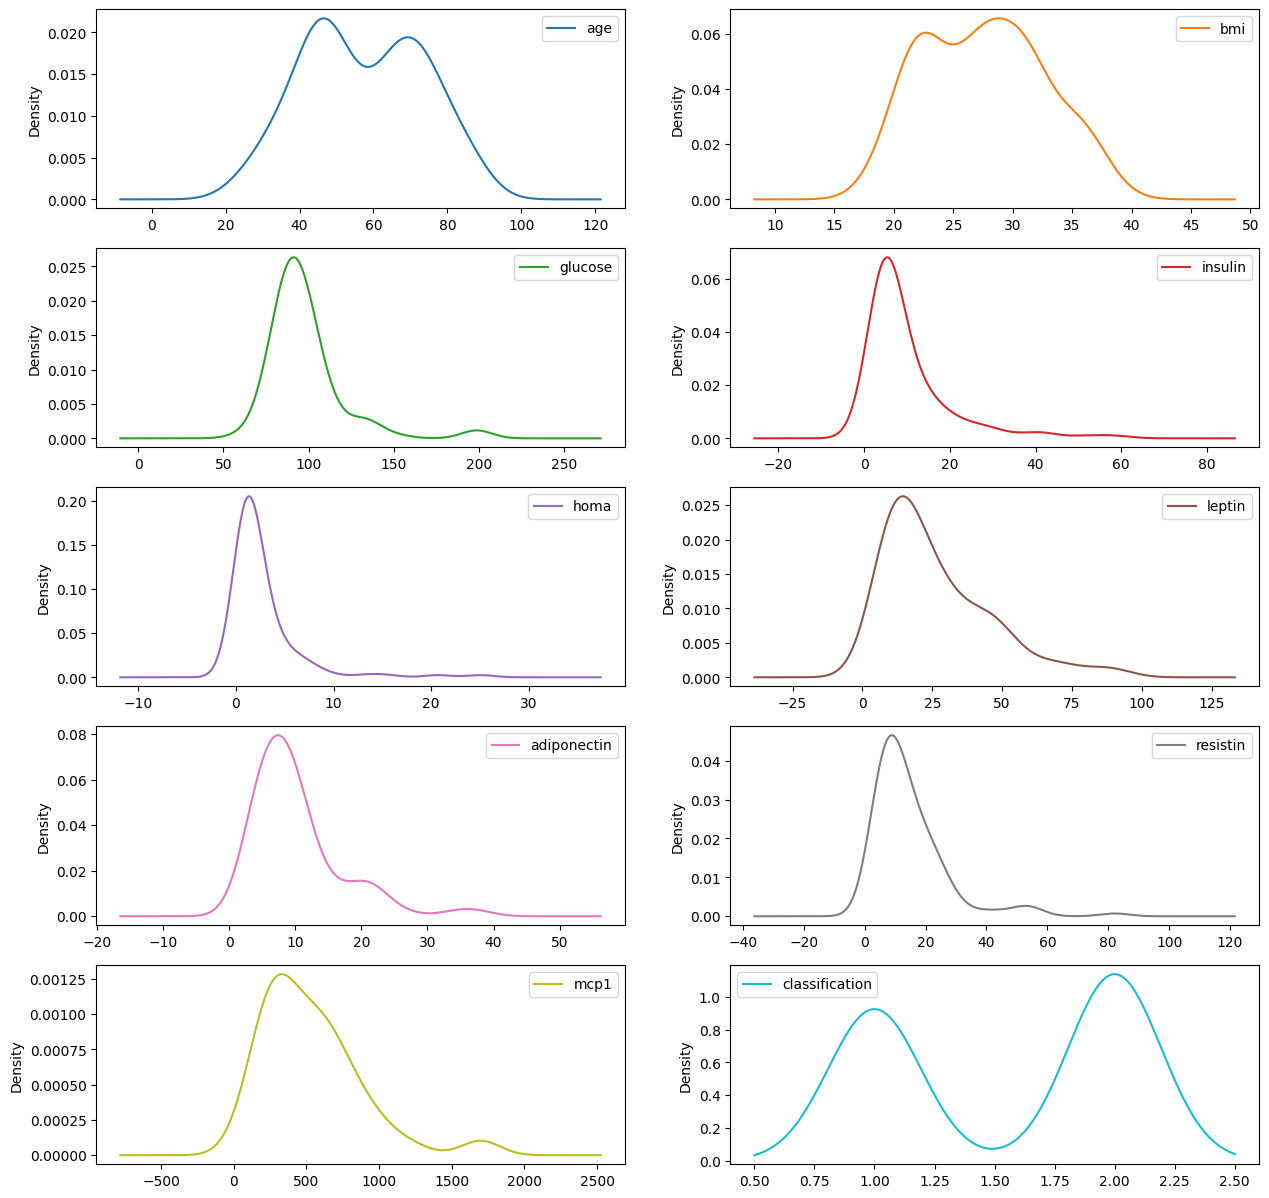

In [10]:
dt.plot(kind = 'density', subplots = True, sharex = False, layout = (5,2), figsize = (15,15))
plt.show()

A distribuição de frequências entre os atributos também pode ser verificada através de um histograma. Nesta etapa, é possível observar que não há uma distribuição exponencial entre os atributos.

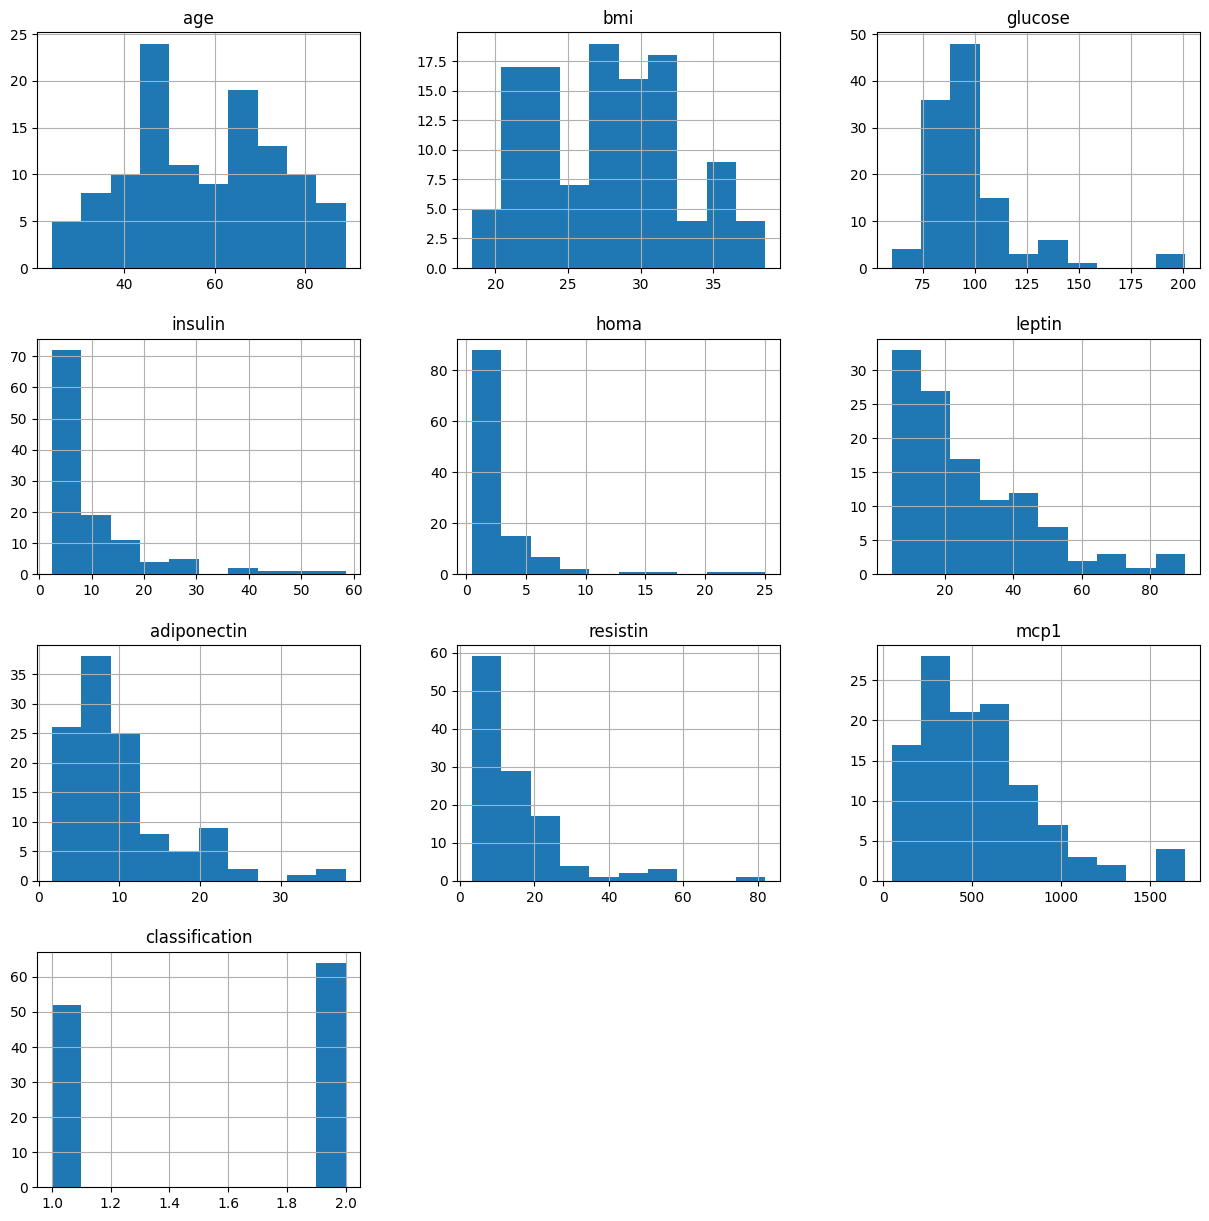

In [11]:
dt.hist(figsize = (15,15))
plt.show()

As medidas de tendências centrais e a dipersão são analisados através do diagrama de caixas (boxplot). Nesta etapa, encontra-se valores atípicos (outliers) em quase todos os atributos, com exceção da idade (age) e IMC (bmi). 

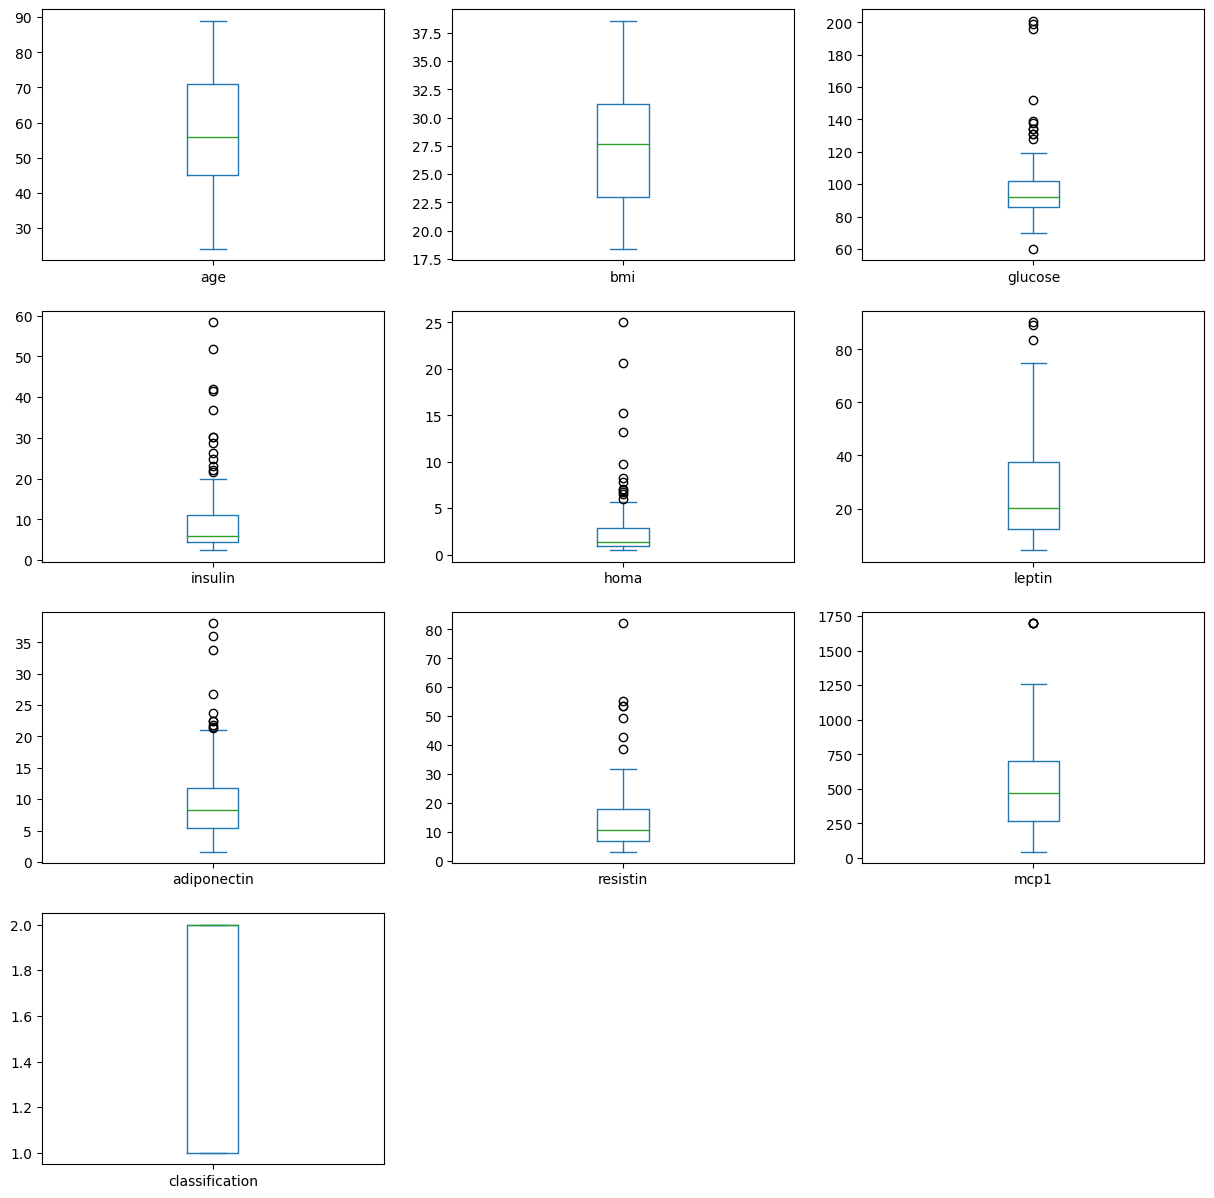

In [12]:
dt.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,15))
plt.show()

A matriz de correlação permite encontrar a associação entre atributos. Para isso, é preciso considerar uma variação de -1 a +1, que traz os seguintes indicadores de acordo com os resultados:
- **menor que zero:** inversamente correlacionado;
- **igual a zero:** não há correlação entre as variantes;
- **mais que zero:** diretamente correlacionados;

A visualização gráfica é oferecida pela biblioteca Seaborn.

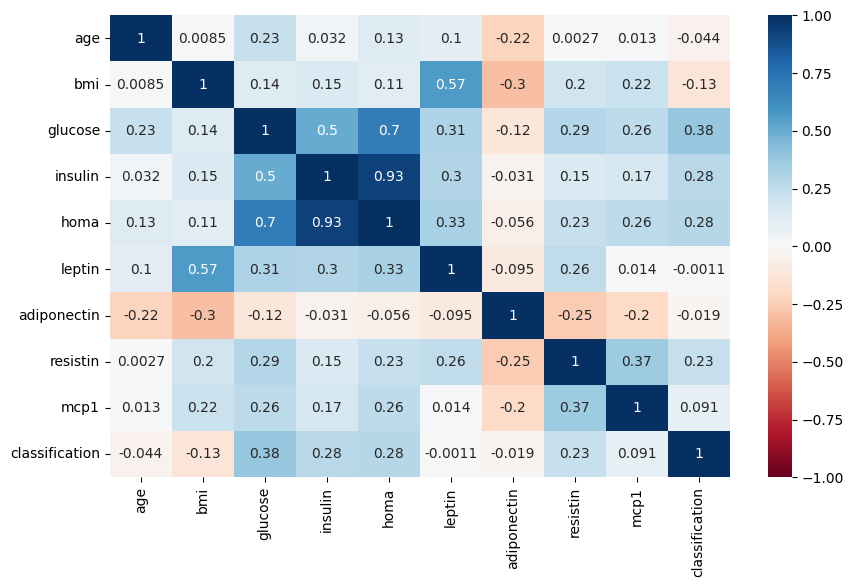

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(dt.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Esta correlação pode ser representada através do gráfico de dispersão (scatter plot).  

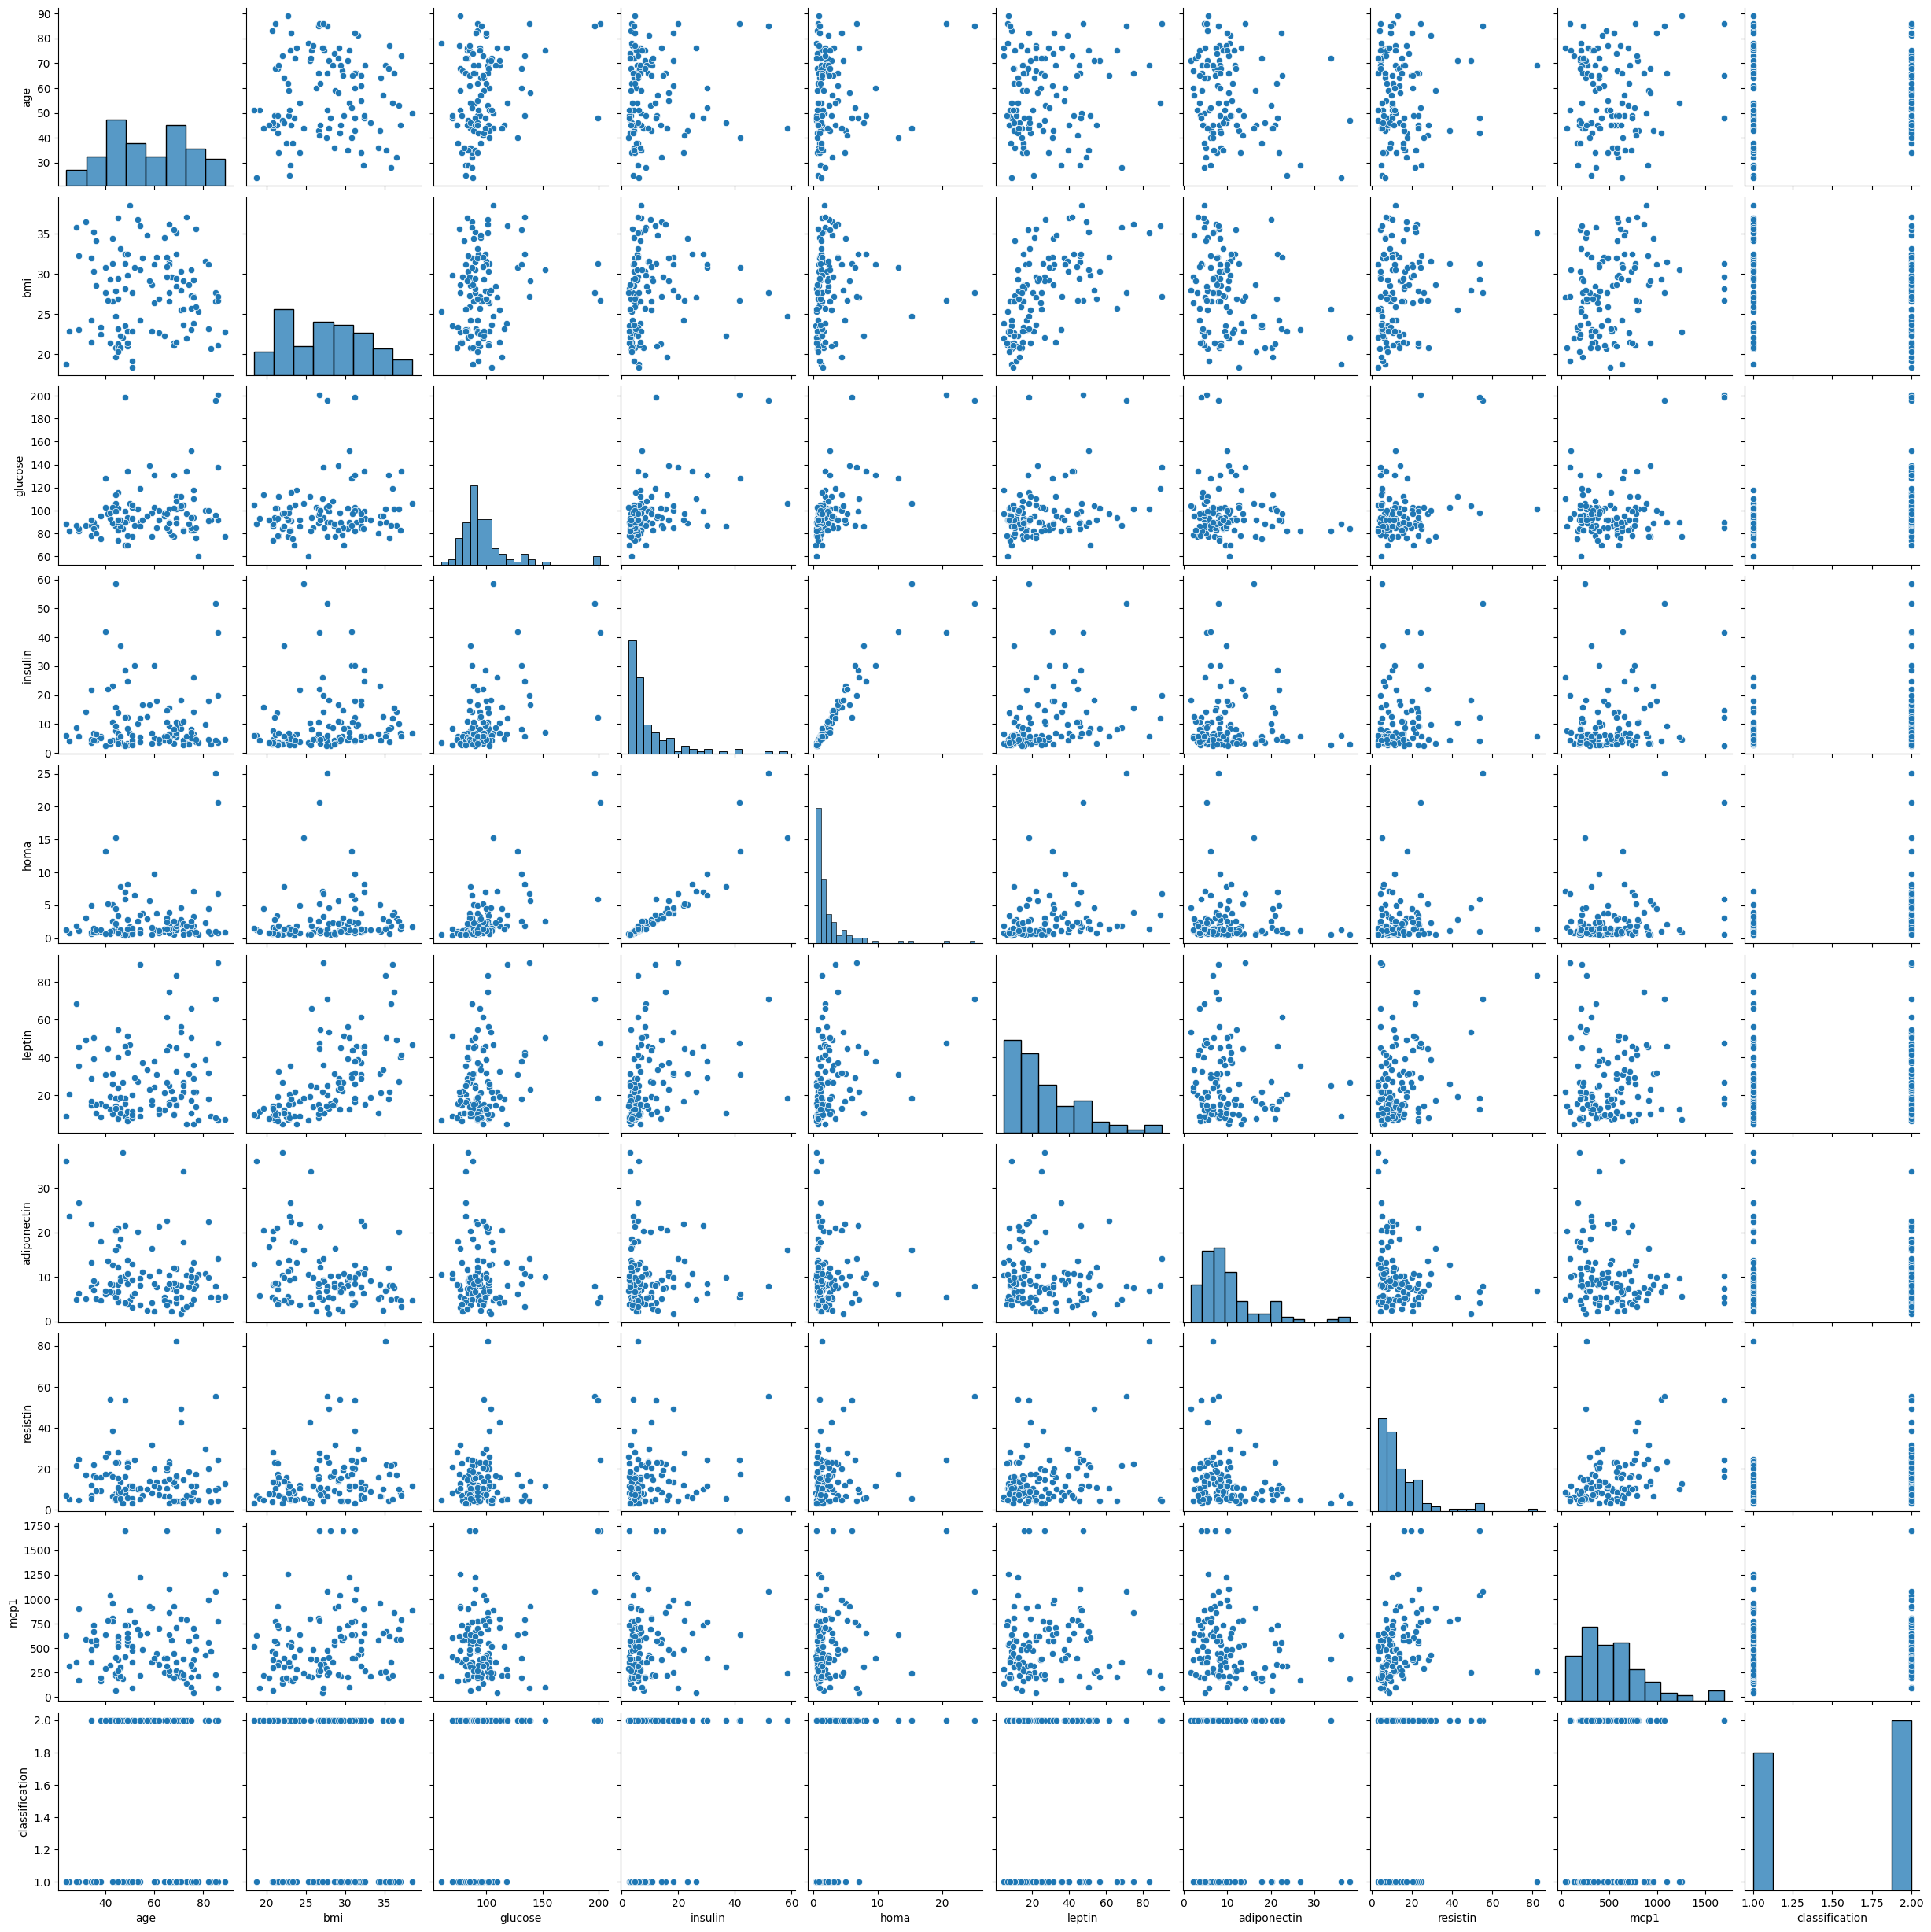

In [14]:
sns.pairplot(dt, height = 2.5);

## 4) Pré-processamento de dados

Nesta etapa final, serão realizadas operações de limpeza, tratamento e preparação dos dados. 

### 4.1) Tratamento de Missings

A primeira etapa consiste na limpeza de dados faltantes. Para isso, vamos utilizar o comando _pandas.isnull_ para averiguar se há falta de valores nos atributos do dataset.

Esta etapa comprova a hipótese levantada no análise inicial: não há dados faltantes no repositório.

In [15]:
dt.isnull().sum()

age               0
bmi               0
glucose           0
insulin           0
homa              0
leptin            0
adiponectin       0
resistin          0
mcp1              0
classification    0
dtype: int64

Como na análise de dados não encontramos nenhum valor igual ou inferior a 0, é possível afirmar que não há informações ausentes no dataset. O mesmo é comprovado ao exibir a visualização matricial da nulidade do dataset.

<Axes: >

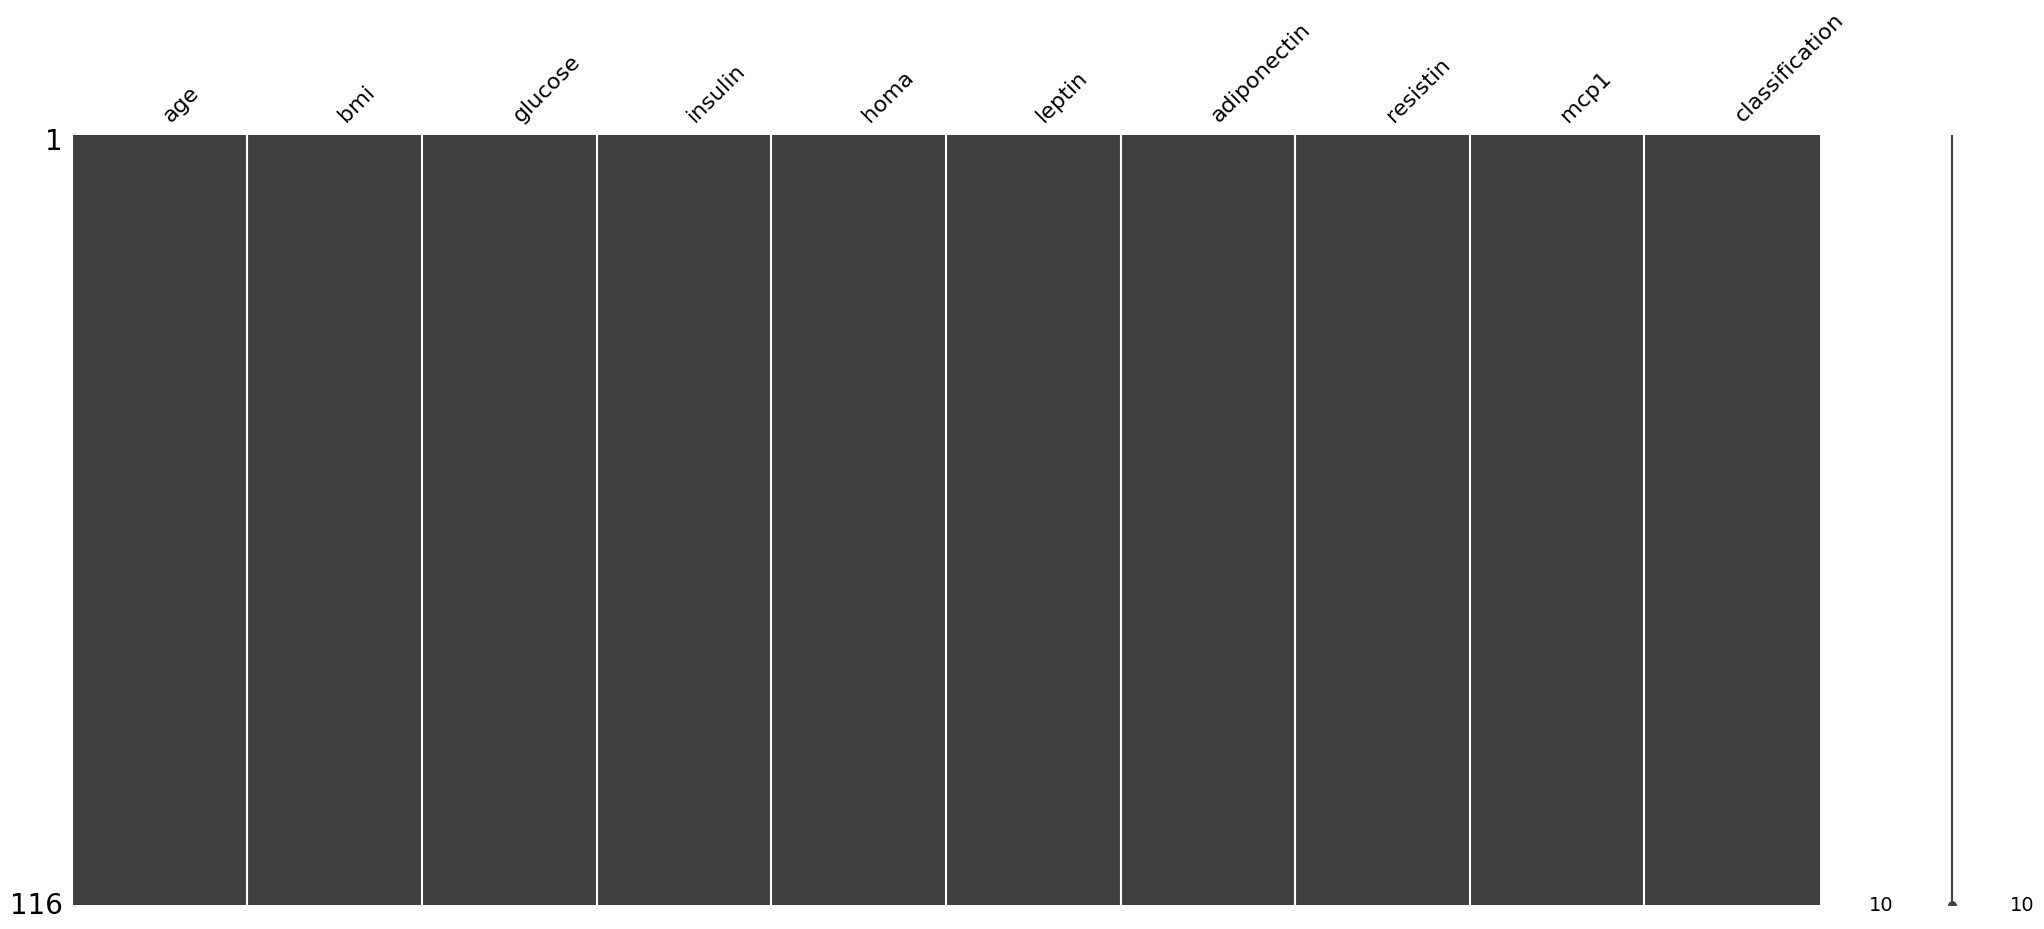

In [16]:
ms.matrix(dt)

### 4.2) Separação em conjunto de treino e conjunto de teste

Após o tratamento dos dados, é hora de prepará-los para o treino de algoritmos. Para isso, é preciso criar conjuntos de validação para realizar testes. Para isso, será separada uma parcela de 20% do conjunto. Dessa forma, os 80% restantes serão utilizados para a modelagem.

Ao todo, o conjunto agrega nove colunas com atributos. A décima e última coluna abriga a classe, indicando o grupo de controle e os pacientes com câncer.

In [17]:
array = dt.values
X = array[:,0:9]
y = array[:,9]

Por fim, basta separar os conjuntos para futuras verificações cruzadas. Para criar o conjunto de teste, será utilizada a biblioteca SKLearn com um seed global definido em "7".  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20, shuffle=True, random_state=7, stratify=y)